In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


In [2]:
name = ['angry','disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [3]:
train_filename = "data/train.csv" 

In [4]:
train_df = pd.read_csv(train_filename)

In [5]:
train_df

,label,feature
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [6]:
train_df['label'].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: label, dtype: int64

In [7]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Get the i'th image and reshape the array.
        #image = images[i].reshape(img_shape)
        
        
        # Ensure the noisy pixel-values are between 0 and 1.
        #image = np.clip(image, 0.0, 1.0)

        # Plot image.
        ax.imshow(images[i],
                  cmap = 'gray',
                  interpolation='nearest')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(name[cls_true[i]])
        else:
            xlabel = "True: {0}, Pred: {1}".format(name[cls_true[i]], name[cls_pred[i]])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [8]:
class clean_data(object):
    def __init__(self, filename):
        self._train_df = pd.read_csv(filename)
        self._distribution = self._train_df['label'].value_counts()
        self._train_df['feature'] = self._train_df['feature'].map(lambda x : np.array(list(map(float, x.split()))))
        self._image_size = self._train_df.feature[0].size
        self._image_shape = (int(np.sqrt(self._image_size)), int(np.sqrt(self._image_size)))
        self._dataNum = self._train_df.size
        self._feature = np.array(self._train_df.feature.map(lambda x: x.reshape(self._image_shape)).values.tolist())
        self._label = self._train_df.label.values
        self._labelNum = self._train_df['label'].unique().size


    @property
    def distribution(self):
        return self._distribution
    
    @property
    def image_size(self):
        return self._image_size
    
    @property
    def image_shape(self):
        return self._image_shape
    
    @property
    def dataNum(self):
        return self._dataNum
    
    @property
    def feature(self):
        return self._feature
    
    @property
    def label(self):
        return self._label

    @property
    def labelNum(self):
        return self._labelNum
    

In [9]:
data = clean_data('data/train.csv')

In [10]:
data.labelNum

7

In [11]:
a = pd.read_csv('data/train.csv')['label']

In [12]:
sample_images = [list(a[a == x].index)[0:9] for x in range(data.labelNum)]

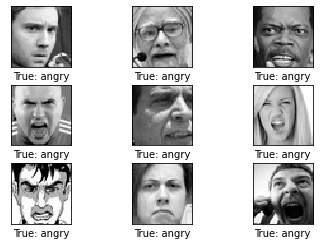

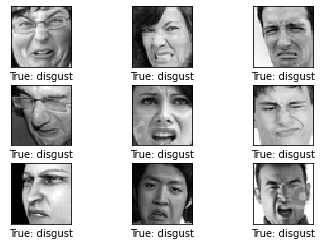

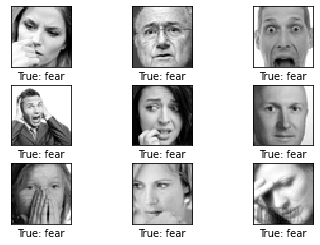

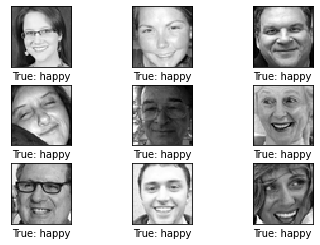

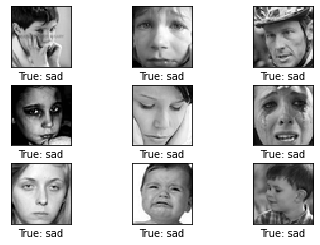

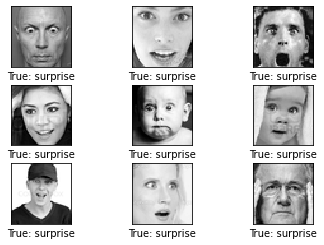

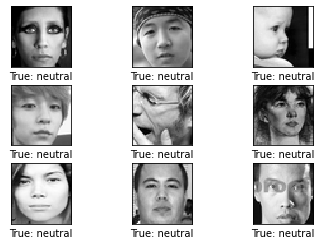

In [13]:
for x in sample_images:
    plot_images(data.feature[x], data.label[x])